In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

### Задачи:
1. Задать модель
2. Задать функцию потерь
3. Написать градиентный спуск

Загружаем данные для нашей линейной регрессии

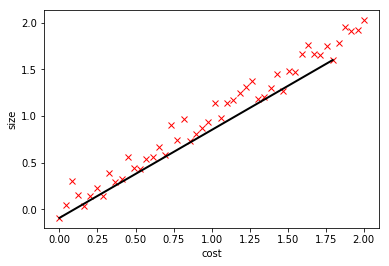

In [47]:
samples=50
x = np.linspace(0,2,samples)
y = x+0.1*np.random.randn(samples)
plt.plot(x,y,'rx')
plt.xlabel('cost')
plt.ylabel('size')

plt.plot([x[0], x[-6]], [y[0], y[-6]], color='k', linestyle='-', linewidth=2)

Предположим, что наша зависимость линейна, тогда 

$h_w(x) = w_0 + w_1x$

нам надо найти такие коэфициенты $w_0$ и $w_1$, чтобы заность между предсказанными и истинными значения была минимальна 

$\sum(y_{pred}-y_{gt})^2 \rightarrow min$

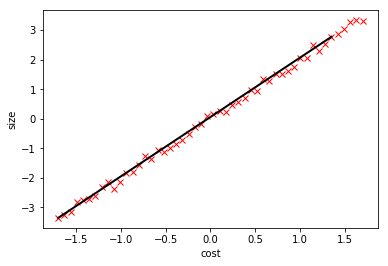

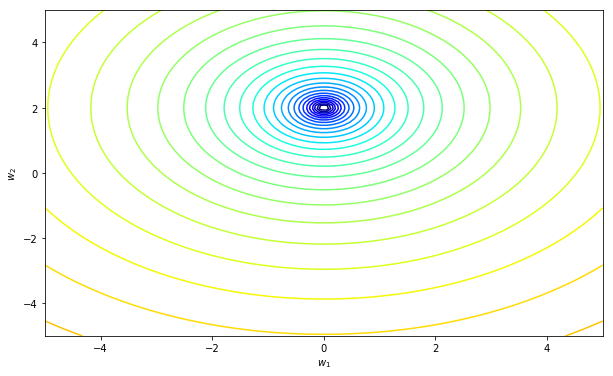

In [72]:
w0, w1 = 1.,1.
samples=50
x = np.linspace(0,15,samples)
z = np.linspace(0,2,samples)

x = (x-np.mean(x))/np.std(x)
z = (z-np.mean(z))/np.std(z)
y = x+z+0.1*np.random.randn(samples)
plt.plot(x,y,'rx')
plt.xlabel('cost')
plt.ylabel('size')

plt.plot([x[0], x[-6]], [y[0], y[-6]], color='k', linestyle='-', linewidth=2)


def h(x,w0,w1):
    return w0+w1*x

def loss(w0,w1):
     return np.sum([np.square(h(xx,w0,w1)-yy) for xx,yy in zip(x,y)])
    
l = np.zeros((100,100))
for i,w0 in enumerate(np.linspace(-5.,5,100)):
    for j,w1 in enumerate(np.linspace(-5.,5,100)):
        l[j,i]=loss(w0,w1)
        
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(np.linspace(-5.,5,100), np.linspace(-5.,5,100),l, levels=np.logspace(0, 5, 35),norm=LogNorm(),cmap=plt.cm.jet)
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')

In [1]:
w0, w1 = 1.,1.

def h(x,w0,w1):
    return w0+w1*x

def loss(w0,w1):
     return np.sum([np.square(h(xx,w0,w1)-yy) for xx,yy in zip(x,y)])
    
l = np.zeros((100,100))
for i,w0 in enumerate(np.linspace(-5.,5,100)):
    for j,w1 in enumerate(np.linspace(-5.,5,100)):
        l[j,i]=loss(w0,w1)
        
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(np.linspace(-5.,5,100), np.linspace(-5.,5,100),l, levels=np.logspace(0, 5, 35),norm=LogNorm(),cmap=plt.cm.jet)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')

NameError: name 'np' is not defined

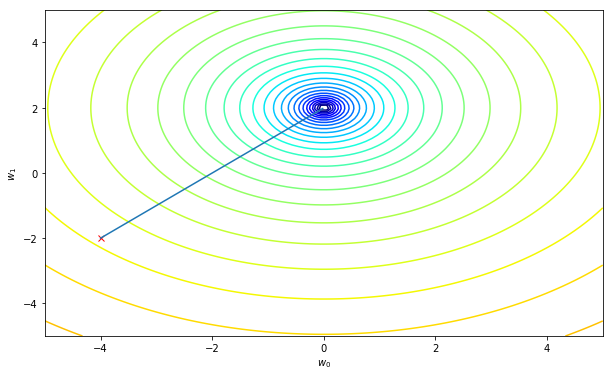

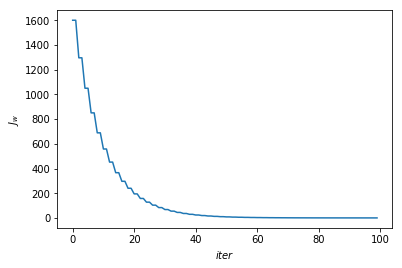

In [74]:

w0, w1 = -4.,-2.
lr = 1e-3
path,losses = [],[]
for i in range(50):
    vl = loss(w0,w1)
    if i%1==0:
        path.append([w0,w1])
        losses.append(vl)
    
    losses.append(vl)
    vh = h(x,w0,w1)
    #TODO Write gradients
    w0-=lr*dldw0
    w1-=lr*dldw1
    
    

path = np.array(path)
#print(path)
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(np.linspace(-5.,5,100), np.linspace(-5.,5,100),l, levels=np.logspace(0, 5, 35),norm=LogNorm(),cmap=plt.cm.jet)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.plot(path[0,0],path[0,1],'rx')
plt.plot(path[:,0],path[:,1])
plt.figure()
plt.plot(losses)
plt.xlabel('$iter$')
plt.ylabel('$J_{w}$')

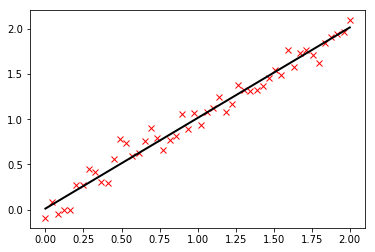

In [17]:
plt.plot(x,y,'rx')
plt.plot(x, h(x,w0,w1), color='k', linestyle='-', linewidth=2)

### Реализуем это с помощью Pytorch!

In [36]:
import torch
from torch import nn, optim
xs = np.array([[a] for a in x])
ys = np.array([[a] for a in y])
x_train = torch.from_numpy(xs).float()
y_train = torch.from_numpy(ys).float()

In [41]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

#Граф выичслений
model = LinearRegression()
#Функция потерь
criterion = nn.MSELoss()
#Оптимизатор
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [43]:
num_epochs = 1000
for epoch in range(num_epochs):
    # forward
    out = model(x_train)
    loss = criterion(out, y_train)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[20/1000], loss: 0.012508
Epoch[40/1000], loss: 0.012421
Epoch[60/1000], loss: 0.012345
Epoch[80/1000], loss: 0.012277
Epoch[100/1000], loss: 0.012217
Epoch[120/1000], loss: 0.012163
Epoch[140/1000], loss: 0.012114
Epoch[160/1000], loss: 0.012070
Epoch[180/1000], loss: 0.012029
Epoch[200/1000], loss: 0.011992
Epoch[220/1000], loss: 0.011957
Epoch[240/1000], loss: 0.011925
Epoch[260/1000], loss: 0.011895
Epoch[280/1000], loss: 0.011866
Epoch[300/1000], loss: 0.011839
Epoch[320/1000], loss: 0.011814
Epoch[340/1000], loss: 0.011789
Epoch[360/1000], loss: 0.011765
Epoch[380/1000], loss: 0.011743
Epoch[400/1000], loss: 0.011721
Epoch[420/1000], loss: 0.011699
Epoch[440/1000], loss: 0.011678
Epoch[460/1000], loss: 0.011658
Epoch[480/1000], loss: 0.011639
Epoch[500/1000], loss: 0.011619
Epoch[520/1000], loss: 0.011600
Epoch[540/1000], loss: 0.011582
Epoch[560/1000], loss: 0.011564
Epoch[580/1000], loss: 0.011546
Epoch[600/1000], loss: 0.011528
Epoch[620/1000], loss: 0.011511
Epoch[640/10

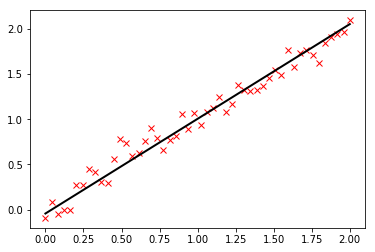

In [46]:
model.eval()
predict = model(x_train)
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'rx', label='Original data')
plt.plot(x_train.numpy(), predict, color='k', linestyle='-', linewidth=2)